# Naive Bayes

## Imports

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.estimator_checks import check_estimator
import pandas as pd
import seaborn as sns
import numpy as np

## Load data

In [2]:
df=pd.read_csv('data/dataset.csv')
df = df[df['genre'].notnull()]
df.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,...,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,...,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,...,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,0.520,0.411,9,-12.411,1,0.0315,0.7860,...,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.5430,...,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country


## Scale data

In [3]:
scaler = StandardScaler()
scale_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']
df[scale_columns] = scaler.fit_transform(df[scale_columns])
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,-0.436492,-0.585931,-0.627031,-0.835991,0.635356,-0.468221,-0.877471,...,-0.107561,0.890630,-0.687838,-0.277328,0.203458,0.485542,-0.149679,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.577487,-1.635045,-1.471757,-2.397885,0.635356,-0.503058,0.311075,...,-0.592326,0.059415,0.814564,-1.171178,0.203458,0.431078,-0.971765,0,60,jazz
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,-0.356116,-0.144672,-0.908606,0.343230,0.635356,-0.550959,-0.806228,...,-0.314361,0.438707,0.268050,-0.912530,0.203458,0.189235,-0.423707,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,-0.300470,-1.009178,1.062421,-0.820391,0.635356,-0.500155,1.791545,...,-0.290032,-0.913025,-0.021797,-0.345450,0.203458,-0.126626,-0.423707,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,1.096842,0.138994,-0.908606,-0.332177,0.635356,1.161878,0.947052,...,-0.881238,1.064136,-0.967994,-0.516273,0.203458,2.101373,-1.519822,1,60,country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41097,What Now,Rihanna,spotify:track:0aUWfpD3PlSv3FTTKcT2rN,-1.030040,0.274073,0.780846,1.034968,-1.573921,-0.307098,-0.774603,...,2.641670,-1.409333,2.134867,0.055160,-2.950450,-0.452732,0.124350,1,10,pop
41098,Tear In My Heart,twenty one pilots,spotify:track:3bnVBN67NBEzedqQuWrpP4,0.534207,-0.014096,-0.908606,1.034237,0.635356,-0.247584,-0.874344,...,-0.738911,-0.521628,-0.028173,-0.560643,0.203458,0.632233,-0.697736,1,10,pop
41099,Sweater Weather,The Neighbourhood,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,0.268347,0.773865,1.343996,1.519770,0.635356,-0.469672,-0.768000,...,-0.563738,-0.719344,0.113760,0.024787,0.203458,2.785570,-0.971765,1,10,pop
41103,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.929906,0.760357,1.343996,1.088104,0.635356,-0.442092,-0.894153,...,-0.332608,0.115906,-0.032280,-0.117772,0.203458,-1.039007,-0.971765,1,10,pop


## Helper functions

In [4]:
def plot_heatmap(model, X_test, y_test, le_genre):
    y_predict = model.predict(X_test)
    conf_matrix_nb=pd.crosstab(
        le_genre.inverse_transform(y_test),
        le_genre.inverse_transform(y_predict),
        rownames=['Actual'],
        colnames=['Predicted']
    )
    sns.heatmap(conf_matrix_nb)

In [5]:
def encode_df(df, le_decade, le_genre):
    df_encoded = df[
        ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
         'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
         'duration_ms', 'chorus_hit', 'decade', 'genre']
    ].copy()
    df_encoded['n_decade'] = le_decade.transform(df_encoded['decade'])
    df_encoded['n_genre'] = le_genre.transform(df_encoded['genre'])
    df_encoded = df_encoded.drop(['genre', 'decade'], axis=1)
    return df_encoded

In [6]:
def split(df):
    return train_test_split(df.drop('n_genre', axis=1), df['n_genre'])

In [7]:
def fit_summary(model, df):
    le_decade = LabelEncoder()
    le_decade.fit(df.decade)
    le_genre = LabelEncoder()
    le_genre.fit(df.genre)
    df_encoded = encode_df(df, le_decade, le_genre)
    X_train, X_test, y_train, y_test = split(df_encoded)
    model.fit(X_train, y_train)
    plot_heatmap(model, X_test, y_test, le_genre)
    print(f'Model accuracy score: {model.score(X_test, y_test)}')
    dummy_model = DummyClassifier(strategy='most_frequent')
    dummy_model.fit(X_train, y_train)
    print(f'DummyClassifier accuracy score: {dummy_model.score(X_test, y_test)}')

## Original data

Model accuracy score: 0.42072089816820957
DummyClassifier accuracy score: 0.3498128816230057


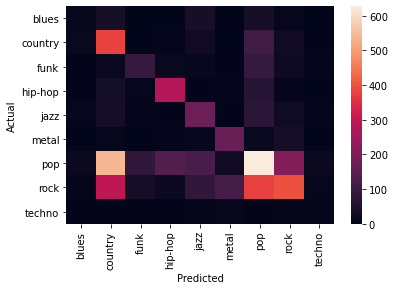

In [8]:
model = GaussianNB()
fit_summary(model, df)

## Upsampling classes

<AxesSubplot:ylabel='genre'>

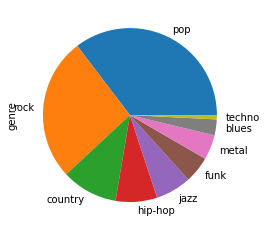

In [9]:
df.genre.value_counts().plot.pie()

In [10]:
df.genre.value_counts()

pop        7181
rock       5394
country    2117
hip-hop    1568
jazz       1347
funk       1001
metal       941
blues       596
techno      162
Name: genre, dtype: int64

Resample all y classes to the largest class, which in this case is pop with 7181 rows.

In [11]:
df_upsampled_list = []
largest_class_count = max(df.genre.value_counts())
for i in np.unique(df.genre):
    tmp = resample(
        df[df.genre == i],
        replace=True,
        n_samples=largest_class_count,
        random_state=0
    )
    df_upsampled_list.append(tmp)
df_upsampled = pd.concat(df_upsampled_list)
df_upsampled

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
28096,Still Got The Blues,Gary Moore,spotify:track:0DnGfA1r8pAssJCuq4ojla,-2.346976,-1.103734,1.062421,-1.328836,-1.573921,-0.444996,-0.046879,...,-0.436009,-1.034076,1.753196,1.496251,-2.950450,0.792689,2.316579,1,90,blues
7347,Honey Hush,Joe Turner,spotify:track:4Ji9WxwfjonQWd7C6wQduH,-0.213911,-0.081636,-1.471757,-0.013120,0.635356,-0.514670,0.175539,...,-0.375185,0.507303,1.136327,1.781516,0.203458,-0.207313,2.590608,1,60,blues
13858,Shakey Ground,Phoebe Snow,spotify:track:3PcNsWAoCaoK63NIBdKj8n,0.837164,0.854913,1.062421,0.006623,0.635356,0.929629,0.078231,...,0.743971,1.043961,-0.884167,0.218325,0.203458,-0.496570,-0.149679,1,70,blues
433,Celebrated Walkin' Blues,Taj Mahal,spotify:track:4oNnxT1kVOAcAYkt8gxXAS,-0.368481,-1.324363,0.499270,-0.855490,0.635356,-0.008077,0.863645,...,-0.650716,-0.247246,0.328821,3.313127,-2.950450,-0.365147,4.234779,0,60,blues
10550,Same Old Man,Karen Dalton,spotify:track:09RdGbLBERtmDDDwsInrGD,-0.609610,-0.910120,-0.063880,0.069752,0.635356,-0.532089,2.086944,...,-0.569821,-1.050216,0.951562,-0.824558,0.203458,1.322467,-0.697736,0,70,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25687,Get Ready For This,2 Unlimited,spotify:track:2P7L26IbmkrqxxtyP1CRRb,1.554369,1.287166,1.625571,0.250121,-1.573921,-0.231617,-0.929913,...,-0.706674,0.208711,0.141823,1.008120,0.203458,-0.535924,0.398379,1,90,techno
26702,Yulquen,Autechre,spotify:track:3PGYnbU4HJDUw01PrME2pz,-0.937298,-2.359969,1.062421,-5.470976,-1.573921,-0.363708,1.930557,...,-0.502915,-0.085845,0.979805,1.790990,3.357366,10.592740,-0.697736,0,90,techno
23938,Twilight Zone,2 Unlimited,spotify:track:4UuhI4gOPHmv15xOnGIJ9x,0.812433,1.597847,-0.627031,0.362242,-1.573921,-0.233068,-0.636634,...,-0.259620,0.781684,0.251767,0.112725,0.203458,-0.475078,1.220464,1,90,techno
24482,Call Me,Le Click,spotify:track:2AKg3zhbkuVTd0LPOVNYSr,0.398186,1.534811,-1.190181,1.357682,-1.573921,0.174819,-0.074681,...,0.883865,0.208711,0.686428,-0.217169,-2.950450,1.313878,-0.971765,1,90,techno


Shuffle rows

In [12]:
df_upsampled = df_upsampled.sample(frac=1).reset_index(drop=True)
df_upsampled.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
0,Valley Of Life,McCoy Tyner,spotify:track:0JXsznzOVq563jXIGDkEIz,-0.918750,-1.207294,-0.908606,-2.360105,-1.573921,-0.369515,1.065211,...,0.044498,-0.513558,-1.518867,0.889020,0.203458,-0.010667,0.672407,0,70,jazz
1,Alarm Call,Björk,spotify:track:0FXA3CxQmpjgP1VS5STnJC,0.509476,1.089050,-0.063880,0.962821,-1.573921,-0.063236,0.033052,...,-0.641593,0.313622,-0.857833,0.240882,0.203458,-1.050835,0.946436,0,90,pop
2,Nashville Cats,The Lovin' Spoonful,spotify:track:4WVDaesMXyHKO8jyr9w6tE,1.282326,-0.829073,-1.471757,-0.531070,0.635356,-0.369515,0.276322,...,-0.563738,0.668704,-1.128263,-0.949670,0.203458,-0.635919,-0.697736,1,60,country
3,I Got A Man,Positive K,spotify:track:4iAYo83eWlktjw97oebIal,1.504906,0.530723,0.499270,-1.025378,0.635356,0.755442,-0.671040,...,0.896030,0.850280,-0.617484,-0.061234,0.203458,-0.446673,-0.423707,1,90,hip-hop
4,I'm Still Searching,Glass Tiger,spotify:track:4W3uRC5mQDQ9ASGmNrOEVl,-0.040793,0.872923,-1.471757,-0.193001,0.635356,-0.519025,-0.936030,...,0.476347,1.362728,0.567370,0.001475,0.203458,0.684477,-0.423707,1,80,rock


<AxesSubplot:ylabel='genre'>

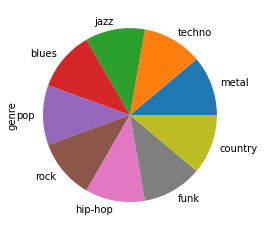

In [13]:
df_upsampled.genre.value_counts().plot.pie()

In [14]:
df_upsampled.genre.value_counts()

metal      7181
techno     7181
jazz       7181
blues      7181
pop        7181
rock       7181
hip-hop    7181
funk       7181
country    7181
Name: genre, dtype: int64

## Upsampled data

Model accuracy score: 0.4834137888352519
DummyClassifier accuracy score: 0.1079960391137517


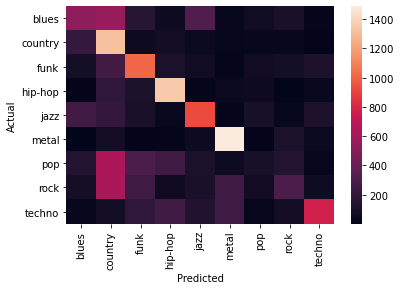

In [15]:
model = GaussianNB()
fit_summary(model, df_upsampled)

## Downsampling classes

In [16]:
df_downsampled_list = []
smallest_class_count = min(df.genre.value_counts())
for i in np.unique(df.genre):
    tmp = resample(
        df[df.genre == i],
        replace=False,
        n_samples=smallest_class_count,
        random_state=0
    )
    df_downsampled_list.append(tmp)
df_downsampled = pd.concat(df_downsampled_list)
df_upsampled = df_upsampled.sample(frac=1).reset_index(drop=True)
df_downsampled

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
15456,Breaking Up Somebody's Home,Albert King,spotify:track:5SxTVDeCB3sK65lbyDpZiK,0.225067,-0.892110,1.062421,0.377598,-1.573921,-0.254842,-0.317951,...,-0.466421,1.225537,1.948985,-0.199124,0.203458,-0.558065,0.672407,1,70,blues
4892,Down In The Valley,Solomon Burke,spotify:track:4X5USMkTYXSIcP3Wu6RPAj,0.855713,-0.671481,-1.190181,-0.374832,0.635356,-0.526283,1.954883,...,-0.508997,1.568514,-0.529622,-0.947414,0.203458,-0.140486,-0.697736,1,60,blues
8171,My Dearest Darling,Etta James,spotify:track:5jcNL4DreI4z4XnTfsx9SQ,-0.164449,-1.306352,0.780846,0.286438,0.635356,-0.565475,1.054785,...,0.938607,-0.150406,-0.583333,-0.648908,-2.950450,-0.273756,-0.423707,1,60,blues
9171,"Cole, Cooke & Redding",Wilson Pickett,spotify:track:5w6dCP5oEZskR2D9TU4Vxe,-0.757997,-1.058707,0.499270,-1.937214,0.635356,-0.116944,0.005250,...,-0.810074,0.196606,0.691507,-0.055662,0.203458,0.287658,-0.149679,1,70,blues
3290,Mellow Down Easy,The Paul Butterfield Blues Band,spotify:track:3w7JOstC58U7VxTQcm7GIN,0.163239,0.368628,-0.908606,0.033435,0.635356,-0.472575,1.520473,...,0.525006,0.850280,-0.081632,-0.757485,0.203458,0.747902,-0.697736,0,60,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,Rydeen,YELLOW MAGIC ORCHESTRA,spotify:track:2w2p6edOY7BNKVgb8qXd9a,-0.102621,1.215123,-0.908606,1.045936,-1.573921,-0.381127,-0.939818,...,-0.788178,1.354658,0.788267,0.333816,0.203458,-1.139795,0.398379,0,70,techno
29856,Kernkraft 400,Zombie Nation,spotify:track:7g8cjrj0sXScNE727685JE,0.898992,-0.482370,0.217695,0.062440,0.635356,0.047082,-0.925604,...,-0.679912,-1.126881,0.687617,-0.348901,0.203458,-0.256770,-0.423707,1,0,techno
26639,Enter,Cybotron,spotify:track:69hRGV0nTPd851z5O50dn5,0.651680,0.328104,-1.190181,-0.414806,0.635356,-0.028399,-0.805186,...,0.482429,0.475023,-0.376846,1.120295,0.203458,-0.258886,2.316579,0,90,techno
30972,Axel F,Crazy Frog,spotify:track:2Ea1iuiNtpR9BcFlQYRE5d,1.826412,1.206118,-0.908606,1.410573,0.635356,-0.356451,-0.001700,...,-0.696942,0.664669,0.617731,-0.738819,0.203458,-0.237010,-0.423707,1,0,techno


In [17]:
df_downsampled.genre.value_counts()

country    162
blues      162
rock       162
metal      162
hip-hop    162
pop        162
jazz       162
techno     162
funk       162
Name: genre, dtype: int64

## Downsampled data

Model accuracy score: 0.5095890410958904
DummyClassifier accuracy score: 0.08767123287671233


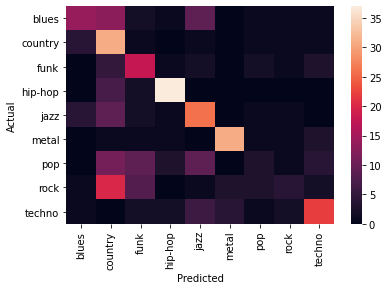

In [18]:
model = GaussianNB()
fit_summary(model, df_downsampled)

## Removing pop and rock

In [19]:
df_no_pop_rock = df.copy()
df_no_pop_rock = df_no_pop_rock[(df_no_pop_rock.genre != 'pop') & (df_no_pop_rock.genre != 'rock')]
df_no_pop_rock

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.577487,-1.635045,-1.471757,-2.397885,0.635356,-0.503058,0.311075,...,-0.592326,0.059415,0.814564,-1.171178,0.203458,0.431078,-0.971765,0,60,jazz
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,1.096842,0.138994,-0.908606,-0.332177,0.635356,1.161878,0.947052,...,-0.881238,1.064136,-0.967994,-0.516273,0.203458,2.101373,-1.519822,1,60,country
19,Let The Good Times Roll,Shirley & Lee,spotify:track:2ePDfIXoP2HmC1hfsujb2J,-0.411761,-0.856089,-1.190181,-0.125972,0.635356,0.041276,0.731584,...,-0.677479,1.463603,0.723821,-1.043811,0.203458,-1.138272,-1.245793,1,60,blues
20,I'm Here To Get My Baby Out Of Jail,The Everly Brothers,spotify:track:1E5cZzKmVgLLJcLI6HPbn4,-0.547782,-1.846669,-0.627031,-1.549422,0.635356,-0.507413,1.770694,...,-0.644634,0.015030,0.256558,-0.228899,0.203458,-0.786784,0.672407,1,60,country
32,Come Rain Or Come Shine,Ray Charles,spotify:track:2htH7r8oqqEwp3BB6oh2cU,-1.308266,-1.887192,-0.627031,-0.923250,0.635356,-0.459511,1.725515,...,2.051680,-1.183372,-0.047734,-0.174469,0.203458,-0.137346,-0.149679,1,60,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41068,My Obsession,Killswitch Engage,spotify:track:3x1Nt4T8cvlBCJtlmKDRAV,0.132325,1.507795,0.780846,1.274810,0.635356,0.328684,-0.939864,...,1.127160,-0.618468,0.147803,-0.151608,0.203458,-0.389451,-0.149679,0,10,metal
41074,Metal Machine,U.D.O.,spotify:track:4MfBk2SvHdVjst7B1Kmcxg,-0.022245,0.980986,-0.908606,0.740285,0.635356,-0.537895,-0.938185,...,0.926442,-0.303737,-0.392192,0.540133,0.203458,0.428018,1.220464,0,10,metal
41079,Whiskey In My Water,Tyler Farr,spotify:track:5E4CJfa6yZNGSKVFSUgaBt,-0.263374,1.066536,0.499270,0.966720,0.635356,-0.336129,-0.088582,...,0.299958,0.027135,1.190003,-0.564545,0.203458,-1.206890,-0.423707,1,10,country
41089,Cake,Flo Rida & 99 Percent,spotify:track:6t2ubAB4iSYOuIpRAOGd4t,1.344153,0.985489,-0.908606,1.169513,0.635356,-0.198231,-0.686678,...,-0.089314,0.446777,-0.569788,-0.913973,0.203458,2.366205,-1.245793,1,10,hip-hop


<AxesSubplot:ylabel='genre'>

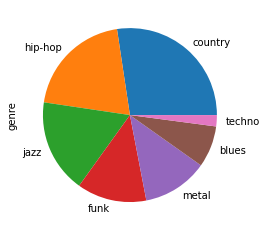

In [20]:
df_no_pop_rock.genre.value_counts().plot.pie()

## Combining smaller classes to other

In [21]:
df_combined = df.copy()
df_combined.loc[(df_combined.genre != 'pop') & (df_combined.genre != 'rock'), 'genre'] = 'other'
df_combined

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,-0.436492,-0.585931,-0.627031,-0.835991,0.635356,-0.468221,-0.877471,...,-0.107561,0.890630,-0.687838,-0.277328,0.203458,0.485542,-0.149679,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.577487,-1.635045,-1.471757,-2.397885,0.635356,-0.503058,0.311075,...,-0.592326,0.059415,0.814564,-1.171178,0.203458,0.431078,-0.971765,0,60,other
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,-0.356116,-0.144672,-0.908606,0.343230,0.635356,-0.550959,-0.806228,...,-0.314361,0.438707,0.268050,-0.912530,0.203458,0.189235,-0.423707,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,-0.300470,-1.009178,1.062421,-0.820391,0.635356,-0.500155,1.791545,...,-0.290032,-0.913025,-0.021797,-0.345450,0.203458,-0.126626,-0.423707,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,1.096842,0.138994,-0.908606,-0.332177,0.635356,1.161878,0.947052,...,-0.881238,1.064136,-0.967994,-0.516273,0.203458,2.101373,-1.519822,1,60,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41097,What Now,Rihanna,spotify:track:0aUWfpD3PlSv3FTTKcT2rN,-1.030040,0.274073,0.780846,1.034968,-1.573921,-0.307098,-0.774603,...,2.641670,-1.409333,2.134867,0.055160,-2.950450,-0.452732,0.124350,1,10,pop
41098,Tear In My Heart,twenty one pilots,spotify:track:3bnVBN67NBEzedqQuWrpP4,0.534207,-0.014096,-0.908606,1.034237,0.635356,-0.247584,-0.874344,...,-0.738911,-0.521628,-0.028173,-0.560643,0.203458,0.632233,-0.697736,1,10,pop
41099,Sweater Weather,The Neighbourhood,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,0.268347,0.773865,1.343996,1.519770,0.635356,-0.469672,-0.768000,...,-0.563738,-0.719344,0.113760,0.024787,0.203458,2.785570,-0.971765,1,10,pop
41103,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.929906,0.760357,1.343996,1.088104,0.635356,-0.442092,-0.894153,...,-0.332608,0.115906,-0.032280,-0.117772,0.203458,-1.039007,-0.971765,1,10,pop


<AxesSubplot:ylabel='genre'>

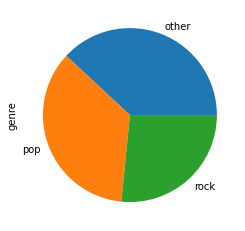

In [22]:
df_combined.genre.value_counts().plot.pie()

In [23]:
df_combined.genre.value_counts()

other    7732
pop      7181
rock     5394
Name: genre, dtype: int64

## Combined data

Model accuracy score: 0.5002954500689384
DummyClassifier accuracy score: 0.370100453023439


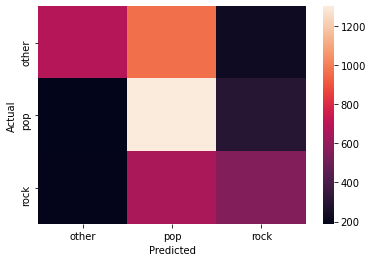

In [24]:
model = GaussianNB()
fit_summary(model, df_combined)

## Conclusion

Naive Bayes doesn't give good results for our data, we hope to see better performance for future models.